# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import nltk
import textwrap   # Wraps the single paragraph in text, and returns a single string containing the wrapped paragraph

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Read the dataset

In [3]:
%cd /content/drive/MyDrive/Course Material/Topic Modeling

/content/drive/MyDrive/Course Material/Topic Modeling


In [4]:
df = pd.read_csv('bbc-text.csv')

In [5]:
df.shape

(2225, 2)

In [6]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# Since Topic Modeling is unsupervised, therefore we just need features

In [7]:
features = df['text']

# Instantiate Count Vectorizer and fit to the features

In [8]:
vectorizer = CountVectorizer(stop_words = 'english') # since model itself based on wordcount, therefore we are not using TFIDF

In [9]:
X = vectorizer.fit_transform(features)

In [10]:
X # This is document by word Matrix

<2225x29126 sparse matrix of type '<class 'numpy.int64'>'
	with 322146 stored elements in Compressed Sparse Row format>

# Instantiate LDA

In [11]:
lda_model = LatentDirichletAllocation(n_components=5, random_state = 42) # default: n_components = 10
# Number of components means number of topics. Changing random state will change the results

In [12]:
lda_model.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

## The following code is copied from the scikit learn documention. This function plots the bar plot of each topic. It will show the top 10 words for each topic. This function will give topic by words matrix

In [13]:
def plot_top_words(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('LDA', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

# Get the total words OR Vocab of the dataset

In [14]:
feature_names = vectorizer.get_feature_names_out()

In [15]:
len(feature_names)

29126

# Apply the function

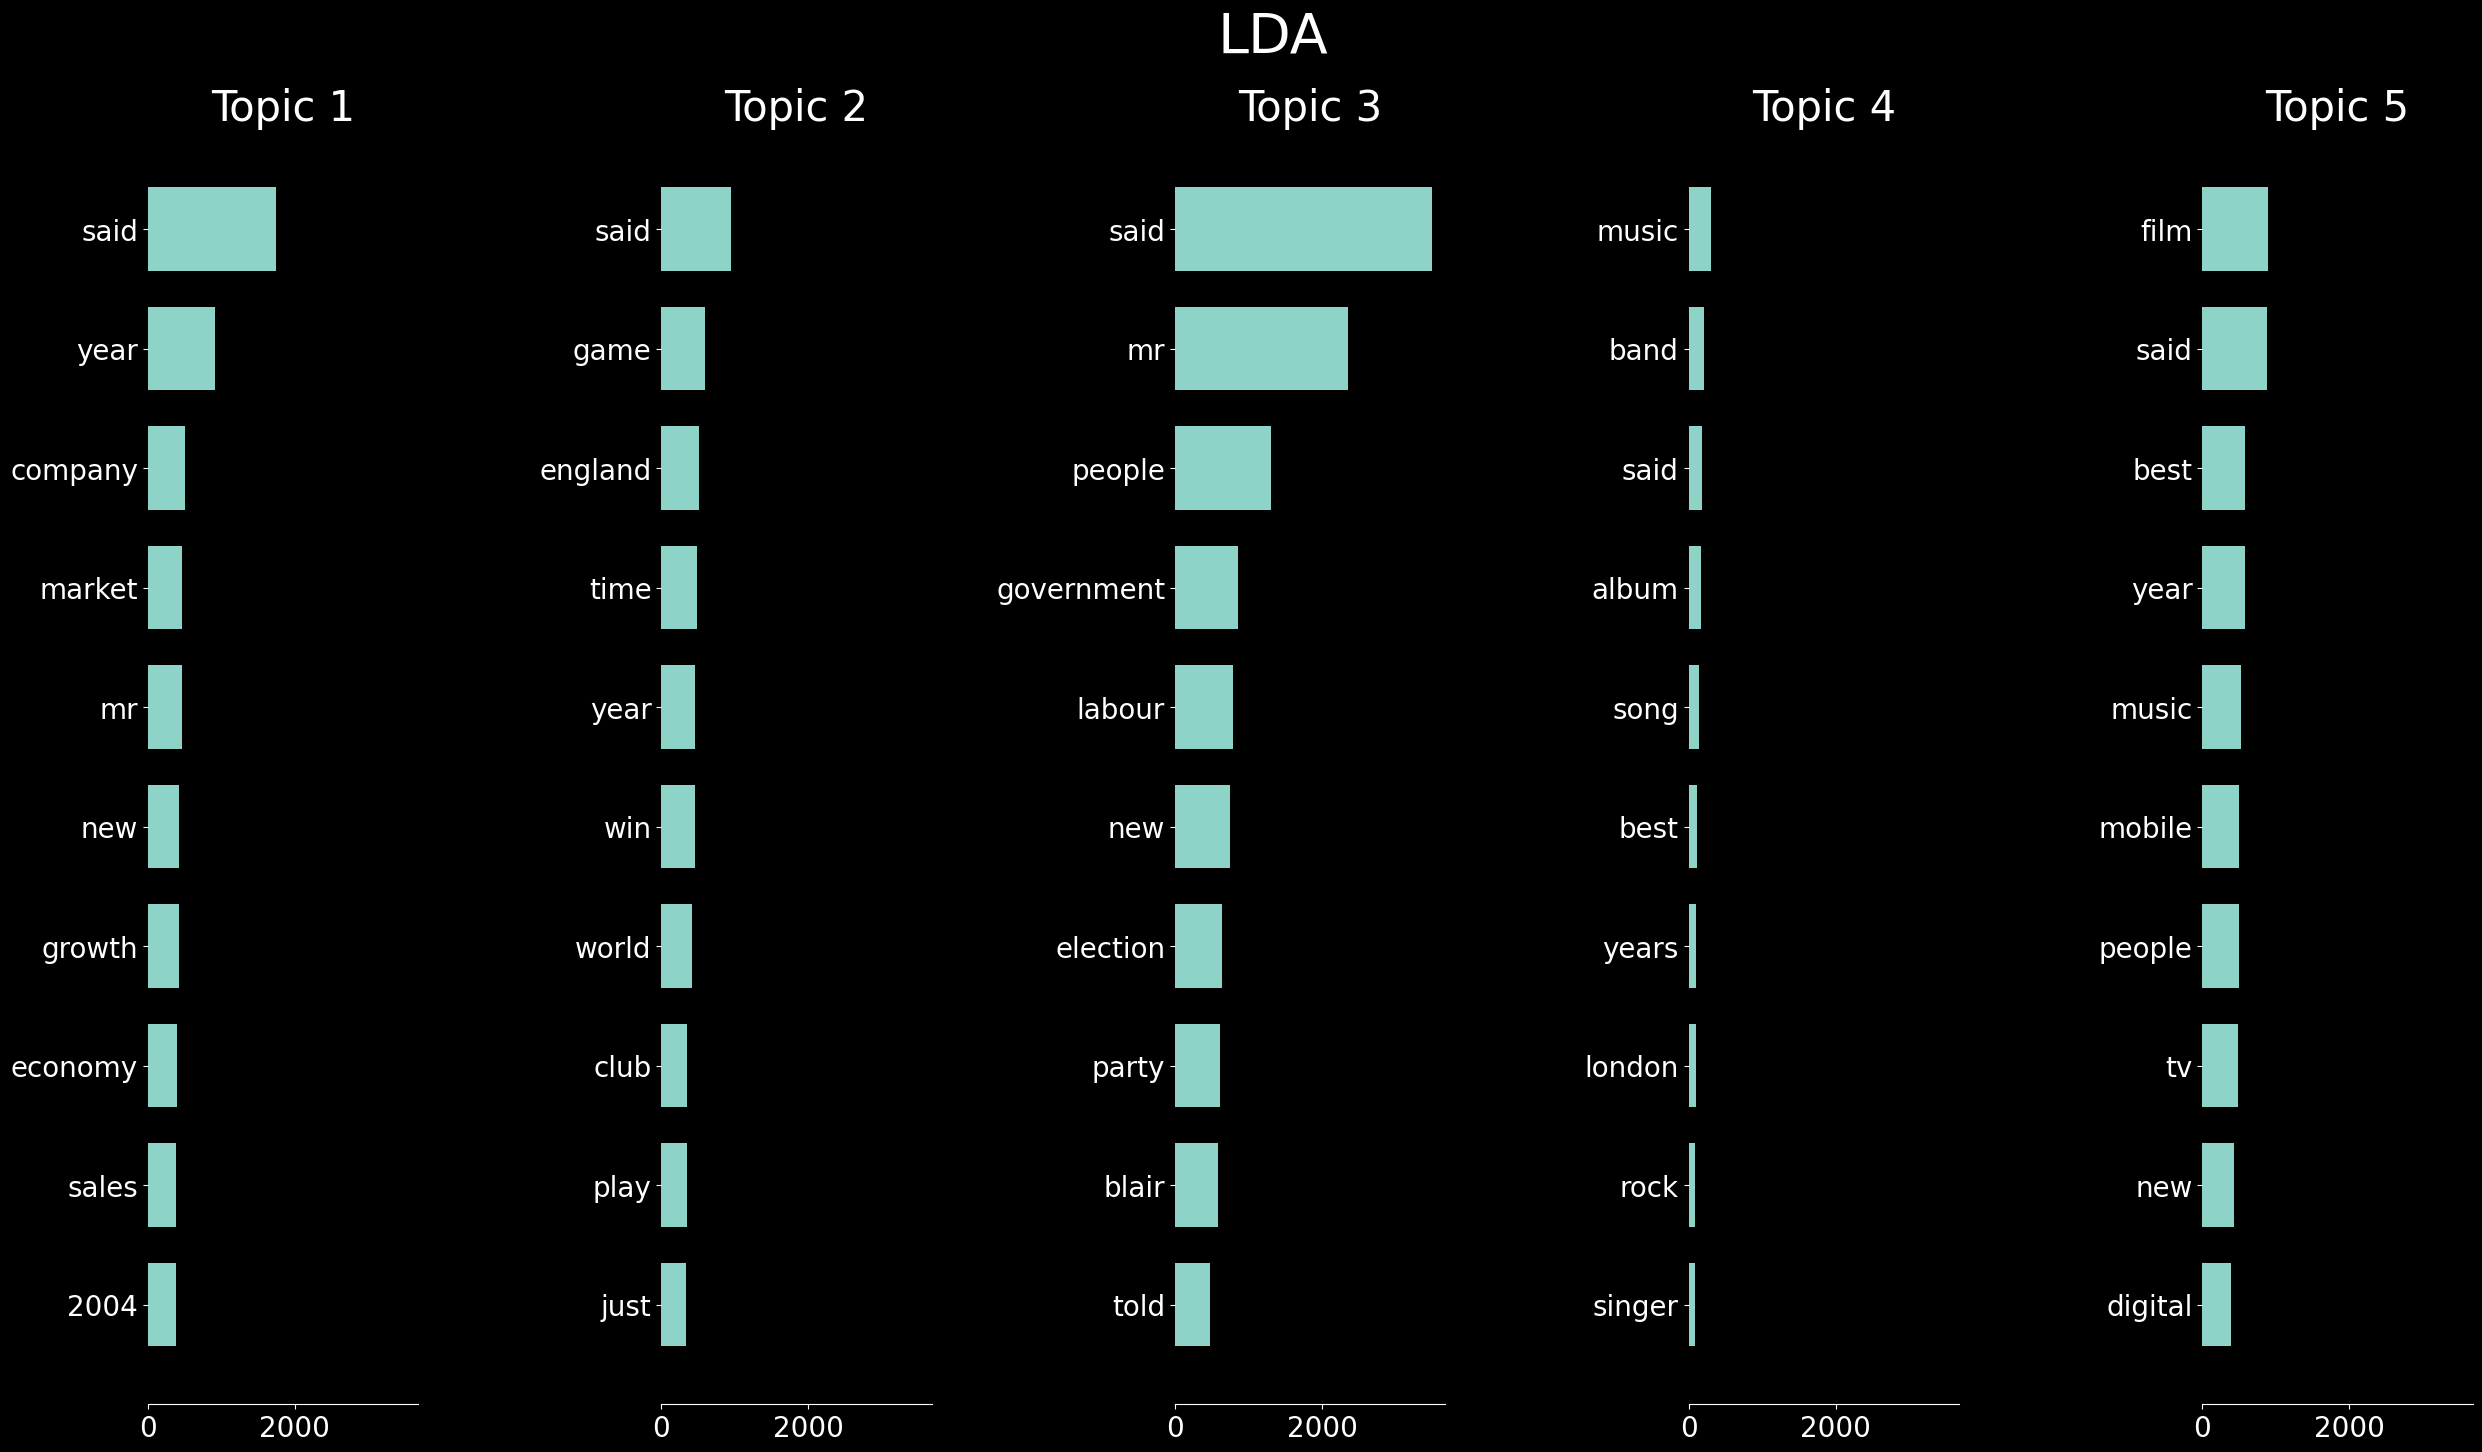

In [16]:
plot_top_words(lda_model, feature_names);

In [ ]:
# We have seen the topics which is the property of the model.
# Now we want to see our documents and want to know how they relate to our topic.
# We have seen topics by word matrix.

# Now we want to see documents by topics matrix.

In [17]:
Z = lda_model.transform(X) # Z is the hidden variable which shows distribution over topics.

In [18]:
Z.shape # document by topic matrix

(2225, 5)

# Select a random document and see if the topic are associated with it.

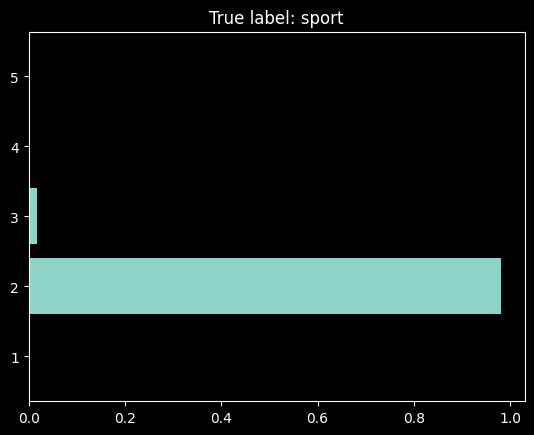

In [23]:
i = np.random.choice(len(df)) # select randon row from the data frame
z = Z[i]# To get the ith row from Z. we get 1D array which represents the distribution over topic
topics = np.arange(5) + 1 # Define the list of topics which are integers from 1 to 5.

# To draw a bar chart plotting the topic distribution along with the topics themselves as well as the true labels

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['category']);

In [24]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

wenger steps up row arsene wenger has stepped up his feud with sir
alex ferguson by claiming the manchester united manager is guilty of
bringing football into disrepute.  the pair s long-running row was put
back in the headlines on saturday when ferguson said his arsenal
counterpart was  a disgrace . wenger initially refused to bite back
saying only:  i will never answer any questions any more about this
man.  but now he claims ferguson should be punished by the football
association.  the latest twist in the ferguson-wenger saga came on
saturday when the united boss  in an interview with the independent
newspaper  discussed the events after the game between the two sides
in october.  united won 2-0 that day  at old trafford  but the game
was followed by a now notorious food fight which saw ferguson s
clothes covered in soup and pizza.  the sides meet again at highbury
on 1 february.  in the tunnel wenger was criticising my players
calling them cheats  so i told him to leave them alone 